<h1>Controll van Der Pol Oscillator with RFPT </h1>

### Load PyPlot for figures

In [74]:
using PyPlot

Adaptivity turned on (Adaptive=1); turn off (Adaptive=0)

In [75]:
Adaptive=1

1

Parameters for the RFPT controller
K: is a big number
B: +1 or -1
A: is a small number

In [76]:
K=1e5
B=-1
A=1e-5

1.0e-5

Time parameters: 
δt: step size 
LONG: the simulation lenght in steps

In [77]:
δt=1e-3
LONG=Int(2e4)

20000

Parameters for Kinematic Block

$\Lambda$ used in

$(\frac{d}{dt}+\Lambda)^n e_{int}$

In [78]:
Λ=3

3

Parameters for Nominal Trajectory

In [79]:
ω=0.5
Ampl=2

2

Parameters for Exact model

In [80]:
μₑ=0.4
ωₑ=0.46
αₑ=1
λₑ=0.1
mₑ=1

1

Parameters for the Approximate model

In [81]:
μₐ=0.5
ωₐ=0.42
αₐ=0.9
λₐ=0.09
mₐ=0.8

0.8

The function for the Exact model:
called with $u$, $q$, $\dot{q}$
and produce $\ddot{q}$

In [82]:
function Exact(u,q,q_p)
  q_pp=(u+μₐ*(1-q^2)*q_p-ωₐ^2*q-αₐ*q^3-λₐ^5)/mₑ
  return q_pp
end

Exact (generic function with 1 method)

The function for the Approximate model:
call with: $q$, $\dot{q}$, $\ddot{q}$, that function produce $u$

In [83]:
function Approx(q,q_p,q_pp)
  u=mₐ*q_pp-μₐ*(1-q^2)*q_p+ωₐ^2*q+αₐ*q^3+λₐ^5
  return u
end

Approx (generic function with 1 method)

The sigmoid function, itt will used on the deformation function of the RFPT.

In [84]:
function sigmoid(x)
  s=x/(1+abs(x))
  return s
end

sigmoid (generic function with 1 method)

The Deformation Function of the RFPT

In [85]:
function G(past_input,past_response,xDnow)#(f,x,xᵈ)
  out=(K+past_input) * (1 + B * sigmoid(A * (past_response - xDnow))) - K
  return out #q_ppReq
end

G (generic function with 1 method)

Create some Vectors to strore variables for plotting (and also used in simulation)

In [86]:
time_mem=zeros(LONG)
q_mem=zeros(LONG) #the realized trajectory
q_p_mem=zeros(LONG)

qN_mem=zeros(LONG) #the nominal trajectory
qN_p_mem=zeros(LONG)

u_mem=zeros(LONG) #the control signal

qN_pp_mem=zeros(LONG) # Accelerations
q_pp_Des_mem=zeros(LONG)
q_pp_Req_mem=zeros(LONG) 
q_pp_mem=zeros(LONG)
0 # to hide the output 

0

Initial parameters for simulation

In [87]:
h_int=0 #The integral of the tracking error
past_input=0
past_response=0

0

The actual simulation

In [88]:
for t=1:LONG-1
  #store time for plotting
  time_mem[t]=t*δt
  #define the nominal trajectory
  qN_mem[t]=Ampl*sin(ω*δt*t)
  qN_p_mem[t]=ω*Ampl*cos(ω*δt*t)
  qN_pp=-ω^2*Ampl*sin(ω*δt*t)
  qN_pp_mem[t]=qN_pp
  #the kinematic
  q_ppDes=Λ^3*h_int+3*Λ^2*(qN_mem[t]-q_mem[t])+3*Λ*(qN_p_mem[t]-q_p_mem[t])+qN_pp
  q_pp_Des_mem[t]=q_ppDes
  if Adaptive==1 && t>10
    q_ppReq=G(past_input,past_response,q_ppDes)
  else
    q_ppReq=q_ppDes
  end
  q_pp_Req_mem[t]=q_ppReq
  u=Approx(q_mem[t],q_p_mem[t],q_ppReq)
  u_mem[t]=u
  #println(Q)
  past_input=q_ppReq

  q_pp=Exact(u,q_mem[t],q_p_mem[t])
  #println(x)
  #println(x)
  q_pp_mem[t]=q_pp

  past_response=q_pp
  q_p_mem[t+1]=q_p_mem[t]+δt*q_pp
  q_mem[t+1]=q_mem[t]+δt*q_p_mem[t]
  h_int=h_int+δt*(qN_mem[t]-q_mem[t])

end #for t=1:LONG-1

## Create figures

The Tracking Error

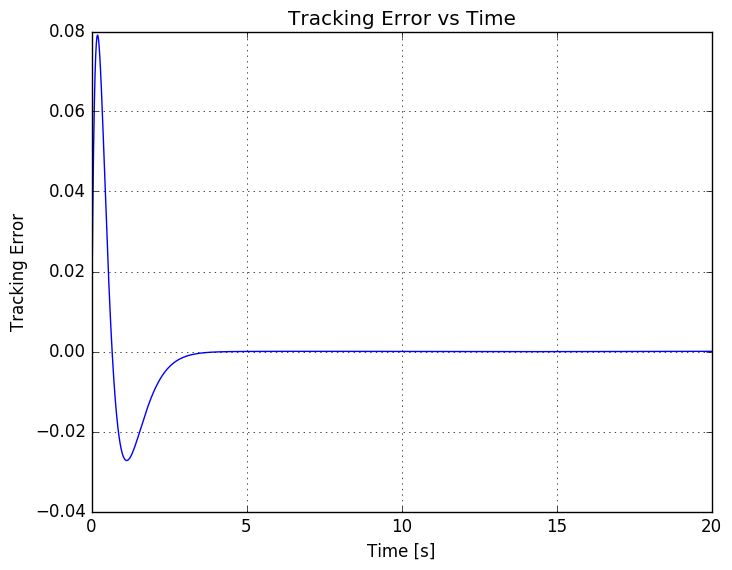

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000032CFEF98>

In [89]:
figure(1)
grid("on")
title("Tracking Error vs Time")
xlabel("Time [s]")
ylabel("Tracking Error")
plot(time_mem[11:LONG-1],qN_mem[11:LONG-1]-q_mem[11:LONG-1], color="blue")

Tracking error "zoomed"

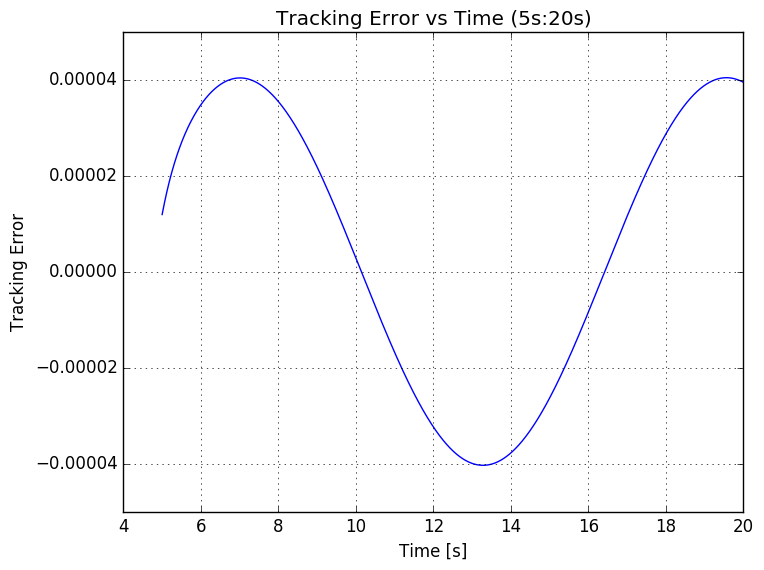

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000037EE9278>

In [107]:
figure(2)
zoom=5000
grid("on")
title("Tracking Error vs Time (5s:20s)")
xlabel("Time [s]")
ylabel("Tracking Error")
plot(time_mem[zoom:LONG-1],qN_mem[zoom:LONG-1]-q_mem[zoom:LONG-1], color="blue")

The Nominal end the Realized Trajectory in same figure

red: Nominal

dashed blue: realized

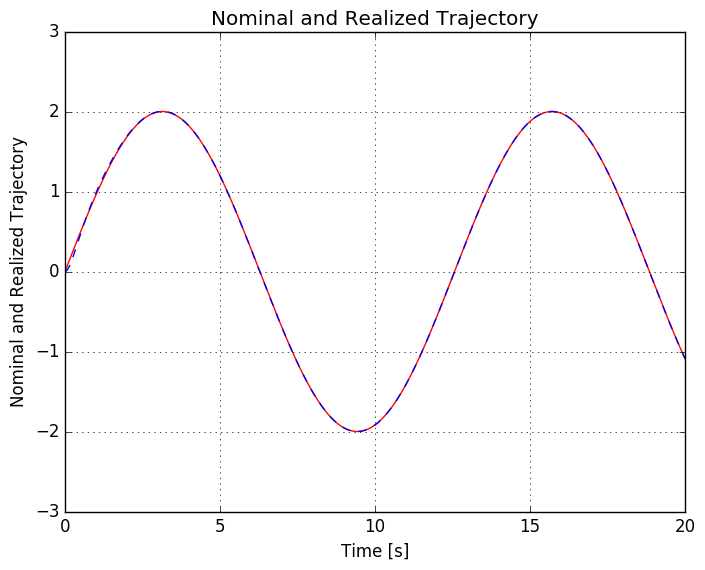

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000331825C0>

In [91]:
figure(3)
grid("on")
title("Nominal and Realized Trajectory")
xlabel("Time [s]")
ylabel("Nominal and Realized Trajectory")
plot(time_mem[3:LONG-1],qN_mem[3:LONG-1],color="red")
plot(time_mem[3:LONG-1],q_mem[3:LONG-1],color="blue", "r--")

The Phase space

Note: phase space is $q$ vs $\dot{q}$

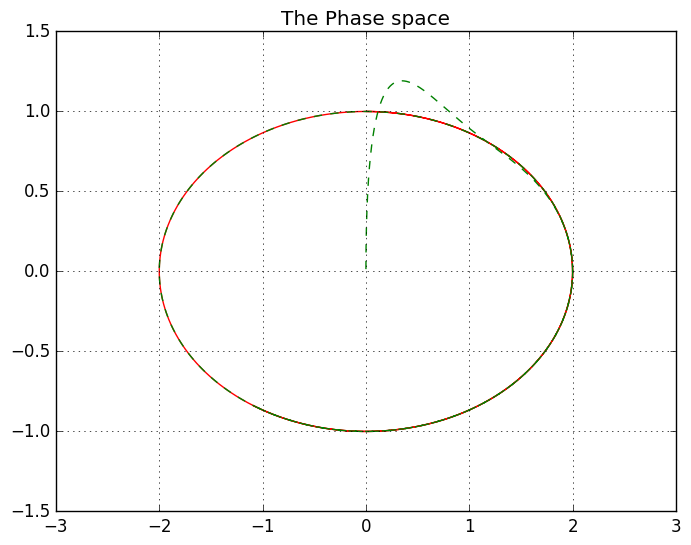

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000034B27EF0>

In [92]:
figure(4)
grid("on")
title("The Phase space")
plot(qN_mem[3:LONG-1],qN_p_mem[3:LONG-1],color="red")
plot(q_mem[3:LONG-1],q_p_mem[3:LONG-1],color="green", "r--")

The Nominal accelerations ($\ddot{q}^N$: red line) 

The Desired accelerations ($\ddot{q}^{Des}$: dashed blue line)

The Realized accelerations ($\ddot{q}$: dash-dot line green line)

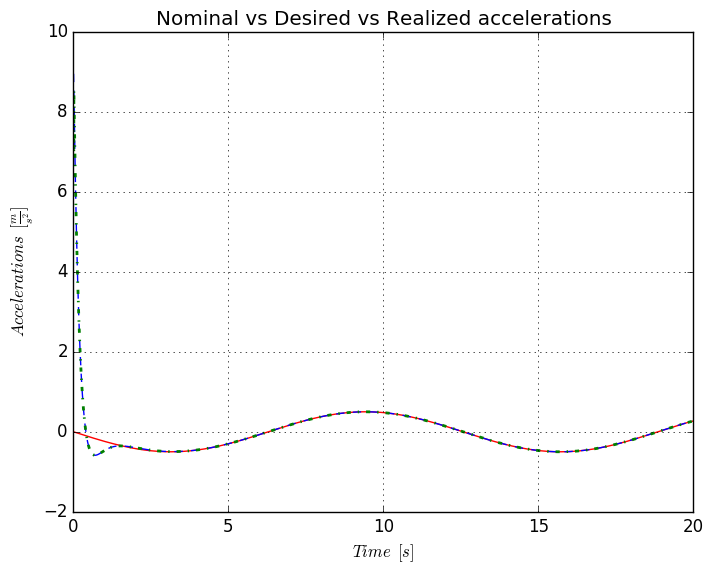

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000034A694E0>

In [93]:
figure(5)
grid("on")
title("Nominal vs Desired vs Realized accelerations")
xlabel(L"Time \enspace [s]")
ylabel(L"Accelerations \enspace [\frac{m}{s^2}]")
plot(time_mem[3:LONG-1],qN_pp_mem[3:LONG-1],color="red")
plot(time_mem[3:LONG-1],q_pp_Des_mem[3:LONG-1],color="blue", "r--")
plot(time_mem[3:LONG-1],q_pp_mem[3:LONG-1],color="green", "r-.", linewidth=2)


Control Signal

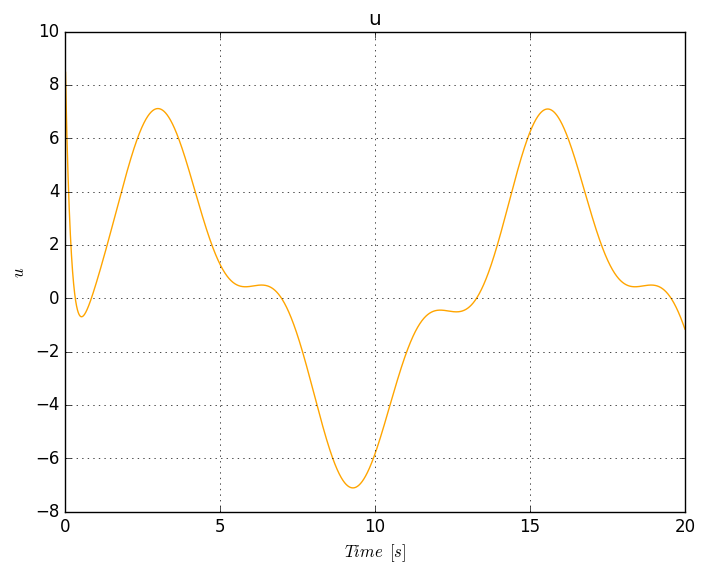

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000032BC83C8>

In [94]:
figure(6)
grid("on")
title("u")
xlabel(L"Time \enspace [s]")
ylabel(L"u")
plot(time_mem[3:LONG-1],u_mem[3:LONG-1],color="orange")

